# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria


  
  Thursday, 27th April, 15:30–17:00 / Room -2.91  
  
  
**Convenors**
* [Dr Edward Byers](mailto:byers@iiasa.ac.at)    - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Matthew Gidden](mailto:gidden@iiasa.ac.at)  - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Fabien Maussion](mailto:fabien.maussion@uibk.ac.at) - University of Innsbruck, Innsbruck, Austria
-------------


# With

![](./figures/dataset-diagram-logo.png)

# you can reach

![](./figures/facet-plot.png)

# Structure of this tutorial

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Working with multiple datasets and computation
4. Introduction to out-of-core computation
5. Working with `pandas` and other packages




# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the xarray approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

<img src="./figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* Extensions based on xarray
* ...

## Where can I find more info?
This notebook introduces xarray for new users in the geophysical sciences.

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray


# 2. Basic operations in `xarray`

-------------------

## Import packages

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import warnings

%matplotlib inline

np.set_printoptions(precision=3, linewidth=80, edgeitems=1)  # make numpy less verbose
xr.set_options(display_width=70)
warnings.simplefilter('ignore')

## Basic data arrays in numpy

In [2]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [3]:
a[1, 2]

4

In [4]:
a.mean(axis=0)

array([ 1.5,  5.5,  6.5])

## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the "air_temperature" tutorial dataset:

In [5]:
ds = xr.tutorial.load_dataset('air_temperature')

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [7]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 241.2 ,  242.5 , ...,  235.5 ,  238.6 ],
        [ 243.8 ,  244.5 , ...,  235.3 ,  239.3 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.9 ,  295.2 ],
        [ 296.29,  296.79, ...,  296.79,  296.6 ]],

       [[ 242.1 ,  242.7 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  232.5 ,  235.7 ],
        ..., 
        [ 296.2 ,  296.7 , ...,  295.5 ,  295.1 ],
        [ 296.29,  297.2 , ...,  296.4 ,  296.6 ]],

       ..., 
       [[ 245.79,  244.79, ...,  243.99,  244.79],
        [ 249.89,  249.29, ...,  242.49,  244.29],
        ..., 
        [ 296.29,  297.19, ...,  295.09,  294.39],
        [ 297.79,  298.39, ...,  295.49,  295.19]],

       [[ 245.09,  244.29, ...,  241.49,  241.79],
        [ 249.89,  249.29, ...,  240.29,  241.69],
        ..., 
        [ 296.09,  296.89, ...,  295.69,  295.19],
        [ 297.69,  298.09, ...,  296.19,  295.69]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 7

In [8]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [9]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'),
             (u'title', u'4x daily NMC reanalysis (1948)'),
             (u'description',
              u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'),
             (u'platform', u'Model'),
             (u'references',
              u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [10]:
ds.air.values

array([[[ 241.2 , ...,  238.6 ],
        ..., 
        [ 296.29, ...,  296.6 ]],

       ..., 
       [[ 245.09, ...,  241.79],
        ..., 
        [ 297.69, ...,  295.69]]])

In [11]:
type(ds.air.values)

numpy.ndarray

In [12]:
ds.air.dims

(u'time', u'lat', u'lon')

In [13]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

In [14]:
ds.air.attrs['tutorial-date'] = 24042017

In [15]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32)),
             ('tutorial-date', 24042017)])

## Let's Do Some Math

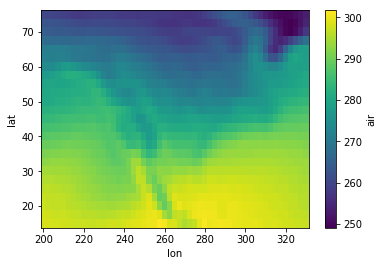

In [16]:
kelvin = ds.air.mean(dim='time')
kelvin.plot()

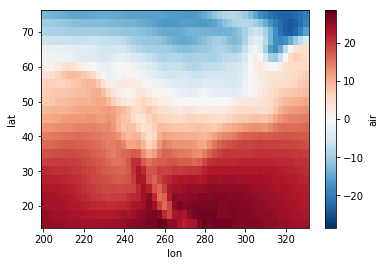

In [17]:
centigrade = kelvin - 273.16
centigrade.plot()

Notice xarray has changed the colormap according to the dataset (borrowing logic from Seaborn).
* With degrees C, the data passes through 0, so a diverging colormap is used
* With Kelvin, the default colormap is used.

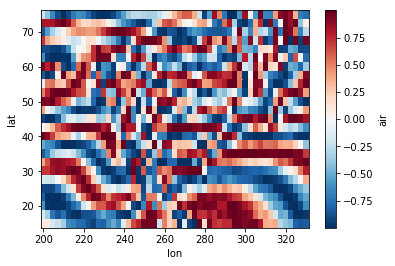

In [18]:
# ufuncs work too
np.sin(centigrade).plot()

## Adding Data to `DataSet`s

In [19]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [20]:
ds['centigrade'] = centigrade
ds

<xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 ...
  * lon         (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time        (time) datetime64[ns] 2013-01-01 ...
Data variables:
    air         (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
    centigrade  (lat, lon) float64 -12.78 -12.98 -13.27 -13.68 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

# 2. Selecting data with named dimensions

In xarray there are many different ways for selecting and indexing data.

### Positional indexing (old way)

This is the "old way", i.e. like ``numpy``:

In [21]:
ds.air[:, 1, 2]

<xarray.DataArray 'air' (time: 2920)>
array([ 244.7 ,  244.2 ,  244.  , ...,  248.59,  248.49,  248.39])
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [ 185.16  322.1 ]
    tutorial-date:  24042017

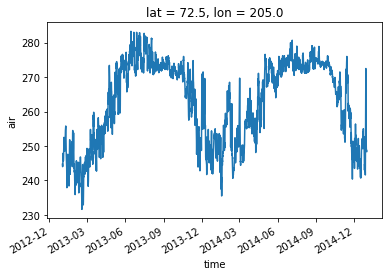

In [22]:
ds.air[:, 1, 2].plot()

This selection implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.

### Selection by index

Selection based on the **index** of a coordinate:

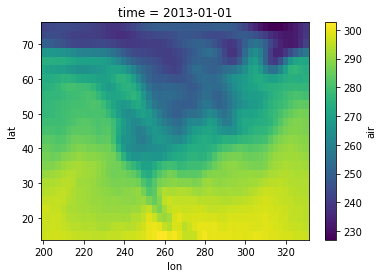

In [23]:
ds.air.isel(time=0).plot()

### Selection by value

Selection based on the **value** of a coordinate:

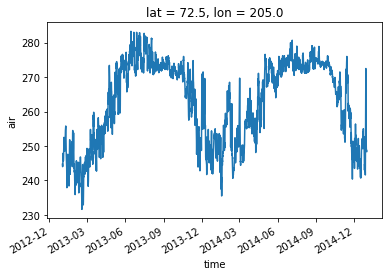

In [24]:
ds.air.sel(lat=72.5, lon=205).plot()

### Selection by value works well for time, too

(array([ 251.,  532.,  379.,  296.,  456.,  613.,  582.,  510.,  997.,  684.]),
 array([ 232.39 ,  239.361,  246.332,  253.303,  260.274,  267.245,  274.216,
         281.187,  288.158,  295.129,  302.1  ]),
 <a list of 10 Patch objects>)

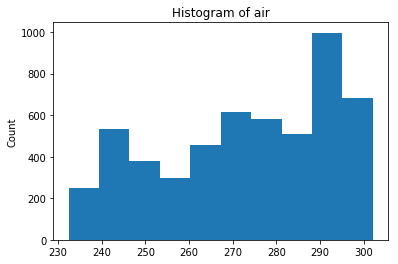

In [25]:
ds.air.sel(time='2013-01-02').plot() # Note that we will extract 4 time steps!

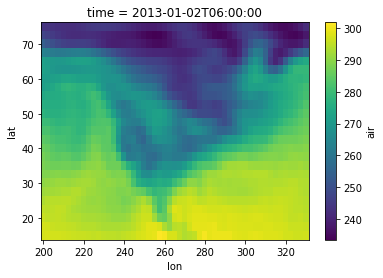

In [26]:
ds.air.sel(time='2013-01-02T06:00').plot() # or look at a single timestep

### Selecting a range of values
The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

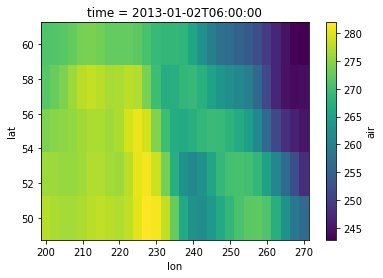

In [27]:
ds.air.sel(lat=slice(60, 50), lon=slice(200, 270), time='2013-01-02T06:00:00').plot();

### Nearest neighbor lookup

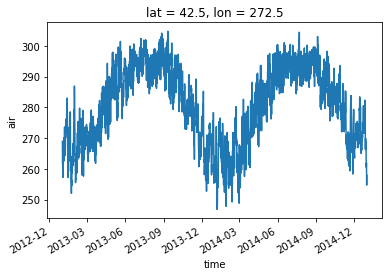

In [28]:
ds.air.sel(lat=41.8781, lon=360-87.6298, method='nearest', tolerance=5).plot()

# 3. Operations and computation

* We can do arithmetic directly on `Dataset` and `DataArray` objects. 
* Labels are preserved and dataArray dimensions automatically aligned.

### Broadcasting

<img src="./figures/broadcast.png" width="50%" align="left"> 

In [29]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

### Alignment

<img src="./figures/align.png" width="50%" align="left"> 

In [30]:
atime = np.arange(3)
btime = np.arange(5) + 1
atime, btime

(array([0, 1, 2]), array([1, 2, 3, 4, 5]))

In [31]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':atime})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':btime})
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

### Aggregation


In [32]:
ds.max()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float64 317.4
    centigrade  float64 28.49

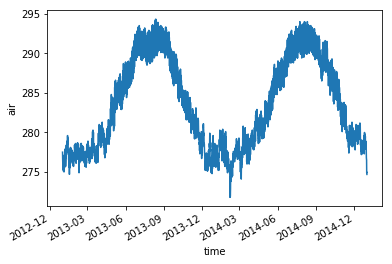

In [33]:
ds.air.median(dim=['lat', 'lon']).plot()

### Masking with `.where()`

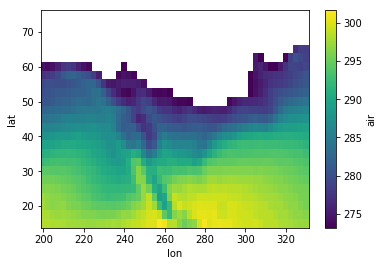

In [34]:
means = ds.air.mean(dim=['time'])
means.where(means > 273.15).plot()

### Dealing with Outliers

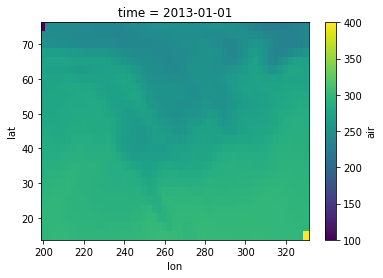

In [35]:
air_outliers = ds.air.isel(time=0).copy()
air_outliers[0, 0] = 100
air_outliers[-1, -1] = 400
air_outliers.plot()

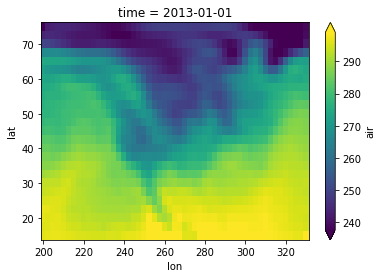

In [36]:
air_outliers.plot(robust=True)

Using `robust=True` uses the 2nd and 98th percentiles of the data to compute the color limits.

# 4. Groupby and "split-apply-combine"

Xarray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [37]:
ds.air.groupby('time.season').mean()

<xarray.DataArray 'air' (season: 4)>
array([ 273.649681,  289.204887,  278.991373,  283.028147])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [38]:
ds.air.groupby('time.month').mean('time') #.mean()

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[ 246.349758,  246.385927, ...,  244.087742,  245.646532],
        [ 248.8575  ,  248.907298, ...,  243.508468,  246.754516],
        ..., 
        [ 296.544677,  296.47    , ...,  295.081411,  294.530161],
        [ 297.154476,  297.238427, ...,  295.775806,  295.636774]],

       [[ 246.677098,  246.405625, ...,  243.001875,  244.443661],
        [ 247.799955,  247.759866, ...,  242.266116,  245.066429],
        ..., 
        [ 296.787768,  296.634687, ...,  294.21808 ,  293.702768],
        [ 297.289107,  297.216696, ...,  294.956027,  294.88    ]],

       ..., 
       [[ 253.744667,  253.644875, ...,  243.934417,  245.141958],
        [ 259.12975 ,  258.629208, ...,  243.079583,  245.466167],
        ..., 
        [ 298.587833,  298.420292, ...,  298.194   ,  297.908333],
        [ 298.811458,  298.856625, ...,  298.751875,  298.818958]],

       [[ 247.970887,  248.020968, ...,  241.023589,  242.628065],
        [ 249

In [39]:
clim = ds.air.groupby('time.month').mean('time')

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [40]:
anomalies = ds.groupby('time.month') - clim

In [41]:
anomalies

<xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 ...
  * lon         (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time        (time) datetime64[ns] 2013-01-01 ...
    month       (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Data variables:
    air         (time, lat, lon) float64 -5.15 -3.886 -2.715 ...
    centigrade  (time, lat, lon) float64 -259.1 -259.4 -259.5 ...

(array([  8.400e+01,   9.000e+02,   1.146e+04,   9.762e+04,   5.206e+05,
          2.677e+06,   4.679e+05,   8.460e+04,   8.757e+03,   4.490e+02]),
 array([-33.741, -27.574, -21.406, -15.239,  -9.072,  -2.905,   3.263,   9.43 ,
         15.597,  21.764,  27.932]),
 <a list of 10 Patch objects>)

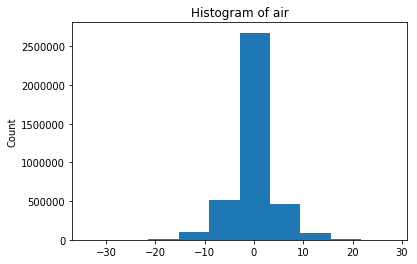

In [42]:
anomalies.air.plot() 

(array([  1.800e+01,   5.230e+02,   4.120e+03,   1.382e+04,   5.814e+04,
          5.203e+04,   1.410e+04,   4.672e+03,   8.970e+02,   8.100e+01]),
 array([-23.194, -18.549, -13.903,  -9.258,  -4.612,   0.033,   4.679,   9.324,
         13.97 ,  18.615,  23.261]),
 <a list of 10 Patch objects>)

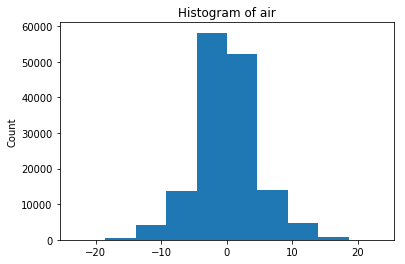

In [43]:
anomalies.air.sel(time= '2013-02').plot() # Find all the values for February

Resample adjusts a time series to a new resolution:

In [44]:
tmin = ds.air.resample('1D', dim='time', how='min')  # Resample to one day '1D
tmax = ds.air.resample('1D', dim='time', how='max')

In [45]:
tmin

<xarray.DataArray 'air' (time: 730, lat: 25, lon: 53)>
array([[[ 241.2 ,  241.8 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  231.5 ,  234.5 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.5 ,  295.1 ],
        [ 296.29,  296.29, ...,  296.4 ,  296.6 ]],

       [[ 243.2 ,  243.1 , ...,  238.8 ,  240.89],
        [ 246.39,  245.3 , ...,  234.89,  237.2 ],
        ..., 
        [ 296.7 ,  296.29, ...,  296.4 ,  296.1 ],
        [ 297.5 ,  297.1 , ...,  296.5 ,  296.9 ]],

       ..., 
       [[ 243.09,  243.39, ...,  245.59,  244.49],
        [ 247.69,  248.19, ...,  242.39,  244.19],
        ..., 
        [ 296.69,  297.39, ...,  295.99,  295.2 ],
        [ 297.79,  298.49, ...,  295.89,  295.5 ]],

       [[ 242.49,  242.39, ...,  241.49,  241.79],
        [ 248.39,  248.79, ...,  240.29,  241.69],
        ..., 
        [ 296.09,  296.89, ...,  295.09,  294.39],
        [ 297.69,  298.09, ...,  295.49,  295.19]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70

In [46]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [47]:
ds_extremes

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ...
Data variables:
    tmax     (time, lat, lon) float64 242.3 242.7 243.5 244.0 ...
    tmin     (time, lat, lon) float64 241.2 241.8 241.8 242.1 ...

# 5. Graphics 

Examples of graphics (1D, 2D - contour, Facet plots)

In [48]:
f = 'ERA-Int-MonthlyAvg-4D-TUVWZ.nc'
dse = xr.open_dataset(f)
dse

<xarray.Dataset>
Dimensions:    (latitude: 241, level: 15, longitude: 480, month: 12)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 ...
  * level      (level) int32 50 100 150 200 300 400 500 600 700 ...
  * longitude  (longitude) float32 -180.0 -179.25 -178.5 -177.75 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    u          (month, level, latitude, longitude) float64 10.38 ...
    v          (month, level, latitude, longitude) float64 5.594 ...
    w          (month, level, latitude, longitude) float64 -0.0003052 ...
    z          (month, level, latitude, longitude) float64 1.888e+05 ...
    t          (month, level, latitude, longitude) float64 201.1 ...
Attributes:
    Conventions:  CF-1.0
    Info:         Monthly ERA-Interim data. Downloaded and edited b...

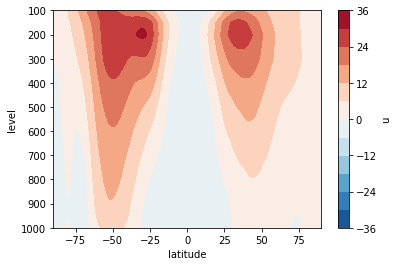

In [49]:
dse.u.mean(dim=['month', 'longitude']).plot.contourf(levels=13)
plt.ylim([1000, 100]);

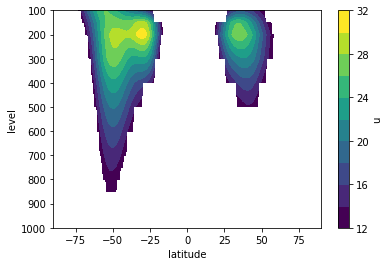

In [50]:
u_avg = dse.u.mean(dim=['month', 'longitude'])
u_avg_masked = u_avg.where(u_avg > 12)
u_avg_masked.plot.contourf(levels=13)
plt.ylim([1000, 100]);

### Plotting on maps

In [51]:
import cartopy.crs as ccrs

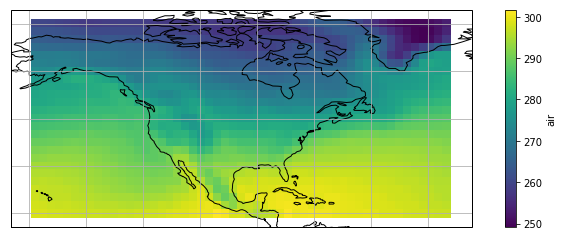

In [52]:
f = plt.figure(figsize=(12, 4))
# Define the map projection of the plots
ax = plt.axes(projection=ccrs.PlateCarree())
# ax is an empty plot. We now plot the variable sw_avg onto ax
ds.air.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

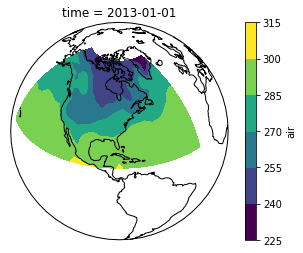

In [53]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

### Seaborn is Cool

Statistical visualization with [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/):

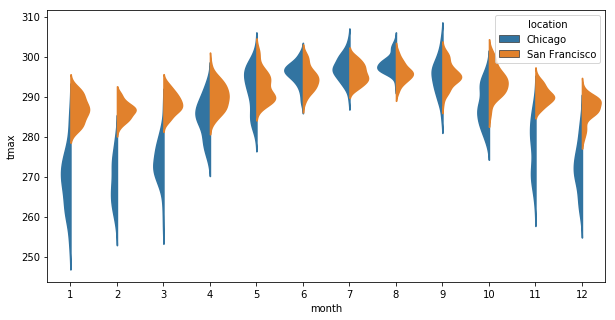

In [54]:
import seaborn as sns

data = (ds_extremes
        .sel_points(lat=[41.8781, 37.7749], lon=[360-87.6298, 360-122.4194],
                    method='nearest', tolerance=3,
                    dim=xr.DataArray(['Chicago', 'San Francisco'],
                                     name='location', dims='location'))
        .to_dataframe()
        .reset_index()
        .assign(month=lambda x: x.time.dt.month))

plt.figure(figsize=(10, 5))
sns.violinplot('month', 'tmax', 'location', data=data, split=True, inner=None)

# 6. xarray also works for data that doesn't fit in memory

Here's a quick demo of [how xarray can leverage dask](http://xarray.pydata.org/en/stable/dask.html) to work with data that doesn't fit in memory. This lets xarray substitute for tools like `cdo` and `nco`.

Tell dask we want to use 4 threads (one for each core we have):

In [55]:
import dask
from multiprocessing.pool import ThreadPool

dask.set_options(pool=ThreadPool(4))

In [56]:
dsdask = xr.open_dataset('ERA-Interim-MonthlyAvg-TUVP.nc').chunk({'time': 100})
dsdask.data

IOError: No such file or directory

In [ ]:
%time ds_seasonal.load()

In [ ]:
%time ds_seasonal = ds.groupby('time.season').mean('time')

In [ ]:
dask.set_options(pool=ThreadPool(16))

In [ ]:
%time ds_month = ds.groupby('time.season').mean('time')

In [ ]:
(ds_seasonal['air']
 .sel(season=['DJF', 'MAM', 'JJA', 'SON'])
 .plot(col='season', size=3, cmap='Spectral_r'))

For more details, read this blog post: http://continuum.io/blog/xray-dask